## Love Songs On The Radio
### Jonby
---

This notebook walks through a fun exercise to find all songs throughout Billboard's history that include some variant of "Love" in the title.

In [2]:
import billboard
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[billboard](https://github.com/guoguo12/billboard-charts) is an unofficial Python API for accessing the Billboard charts in an easily readable way. 

In [3]:
chart = billboard.ChartData('hot-100')

In [4]:
chart

hot-100 chart from 2017-12-16
-----------------------------
1. 'Rockstar' by Post Malone Featuring 21 Savage
2. 'Havana' by Camila Cabello Featuring Young Thug
3. 'Perfect' by Ed Sheeran Duet With Beyonce
4. 'Gucci Gang' by Lil Pump
5. 'Thunder' by Imagine Dragons
6. 'Too Good At Goodbyes' by Sam Smith
7. 'Bodak Yellow (Money Moves)' by Cardi B
8. 'No Limit' by G-Eazy Featuring A$AP Rocky & Cardi B
9. 'What Lovers Do' by Maroon 5 Featuring SZA
10. 'Feel It Still' by Portugal. The Man
11. 'Bad At Love' by Halsey
12. 'Sorry Not Sorry' by Demi Lovato
13. 'Mi Gente' by J Balvin & Willy William Featuring Beyonce
14. '1-800-273-8255' by Logic Featuring Alessia Cara & Khalid
15. 'New Rules' by Dua Lipa
16. 'I Get The Bag' by Gucci Mane Featuring Migos
17. 'MotorSport' by Migos, Nicki Minaj & Cardi B
18. 'Bank Account' by 21 Savage
19. 'I Fall Apart' by Post Malone
20. 'Wolves' by Selena Gomez X Marshmello
21. 'All I Want For Christmas Is You' by Mariah Carey
22. 'Young Dumb & Broke' by Khalid

Using the `love.py` script, I walked through all Billboard Hot 100 charts and created a dataframe with all songs containing some variant of "love" in the title, along with the artist, year, and the number of weeks that song appeared on the charts for the given year.

In [3]:
lovedf = pd.read_csv('data/lovedf.csv', index_col= 0)

In [131]:
lovedf

,Title,Artist,Year,Count
0,What Lovers Do,Maroon 5 Featuring SZA,2017,14
1,Bad At Love,Halsey,2017,13
2,Love.,Kendrick Lamar Featuring Zacari,2017,23
3,Greatest Love Story,LANCO,2017,13
4,Like I Loved You,Brett Young,2017,10
5,Love So Soft,Kelly Clarkson,2017,12
6,I Could Use A Love Song,Maren Morris,2017,15
7,F**k Love,XXXTentacion Featuring Trippie Redd,2017,14
8,Love Galore,SZA Featuring Travis Scott,2017,20
9,Tell Me You Love Me,Demi Lovato,2017,1


First, the number of unique "Love" songs that appeared on the charts for every year.

In [22]:
yearcount = lovedf.groupby("Year").size()

In [23]:
yearcountdf = yearcount.to_frame(name = 'Yearcount')

In [24]:
yearcountdf.reset_index(inplace=True)

In [134]:
yearplot = sns.stripplot(data = yearcountdf, x = "Year", y = "Yearcount")

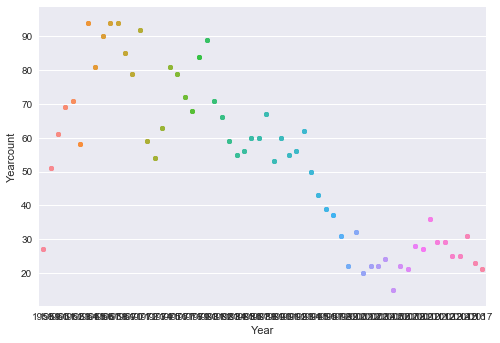

In [135]:
plt.show(yearplot)

What about the song with the longest staying power for every year?

In [137]:
lovedf[lovedf.groupby("Year")['Count'] == lovedf.groupby("Year")['Count'].max()]

TypeError: invalid type comparison

Has the average staying power for songs changed over time? If so, this *could* explain (in part) the drop in the number of unique 'love' songs over time.


In [25]:
avgyearcountdf = lovedf.groupby("Year").mean()
avgyearcountdf.reset_index(inplace = True)

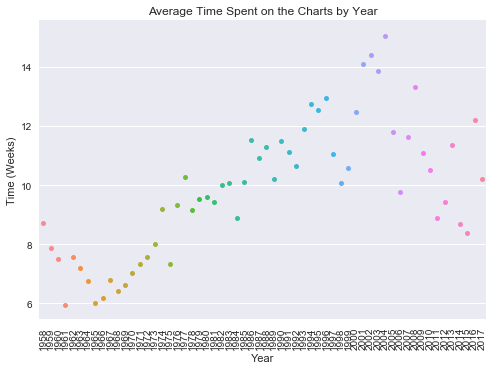

In [44]:
avgyearcountplot = sns.stripplot(data = avgyearcountdf, x = "Year", y = "Count")
avgyearcountplot.set_xticklabels(labels = avgyearcountdf["Year"], rotation = 90)
plt.title("Average Time Spent on the Charts by Year")
plt.ylabel("Time (Weeks)")
plt.xlabel("Year")
plt.show(avgyearcountplot)

Negative correlation between average chart count and number of unique songs on the chart?

In [26]:
yearcomparedf = avgyearcountdf.merge(yearcountdf)
yearcomparedf.columns = ['year', 'mean_chart_stay', 'nunique']

In [27]:
yearcomparedf

,year,mean_chart_stay,nunique
0,1958,8.703704,27
1,1959,7.862745,51
2,1960,7.491803,61
3,1961,5.927536,69
4,1962,7.563380,71
5,1963,7.189655,58
6,1964,6.765957,94
7,1965,6.024691,81
8,1966,6.177778,90
9,1967,6.787234,94


In [45]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}